In [139]:
import numpy as np
import math 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import hamming_loss, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix


#### Loading the Dataset

In [140]:
data = np.load('data.npy', allow_pickle=True)

#### Converting to a Data Frame 

In [141]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734
...,...,...,...,...,...
1495,b1233fbb-68ee-44a0-a8b8-0b399ad1cacd,"[[0.009528579, 0.044194497, 0.038498692, -0.00...","[[0.10134661, -0.10768638, 0.23218037, 0.25022...",stove,53.772519
1496,76c1ee48-25b4-4981-b21f-26a3a2b091bb,"[[-0.003666563, 0.028779637, -0.013404611, -0....","[[0.29125518, -0.18452865, 0.1506041, 0.092724...",carrot,18.516855
1497,9596177d-b182-486e-bbc9-987081647e68,"[[0.00709543, 0.037197262, -0.022390455, 0.001...","[[0.19752023, 0.29306346, -0.28130922, -0.3879...",puppet,94.686575
1498,9ad40994-3c3b-46c0-81b4-05e81589856d,"[[0.009601502, 0.03150965, -0.010726368, 0.000...","[[0.3255903, -0.14218077, 0.0856628, 0.4351619...",listen,25.308092


##### We got to know that the dataset has 1500 examples

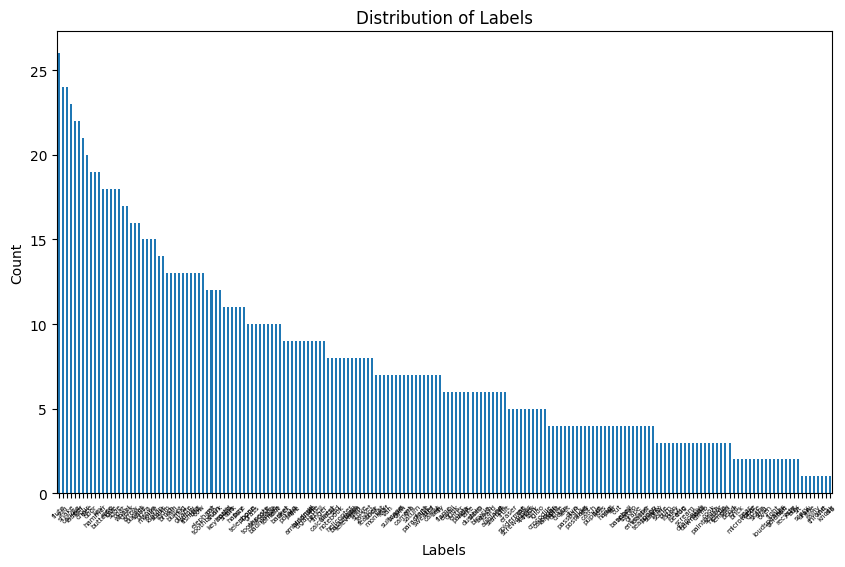

In [142]:
label_counts = df[3].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=5)
plt.show()

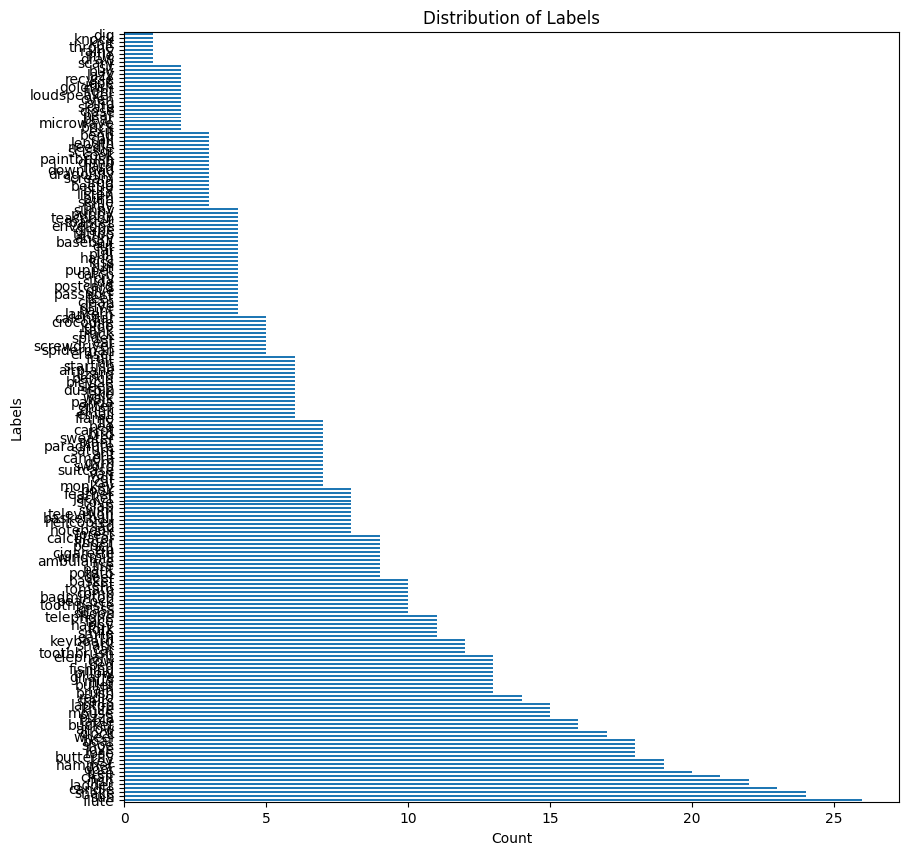

In [143]:
plt.figure(figsize=(10, 10))
label_counts.plot(kind='barh')
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

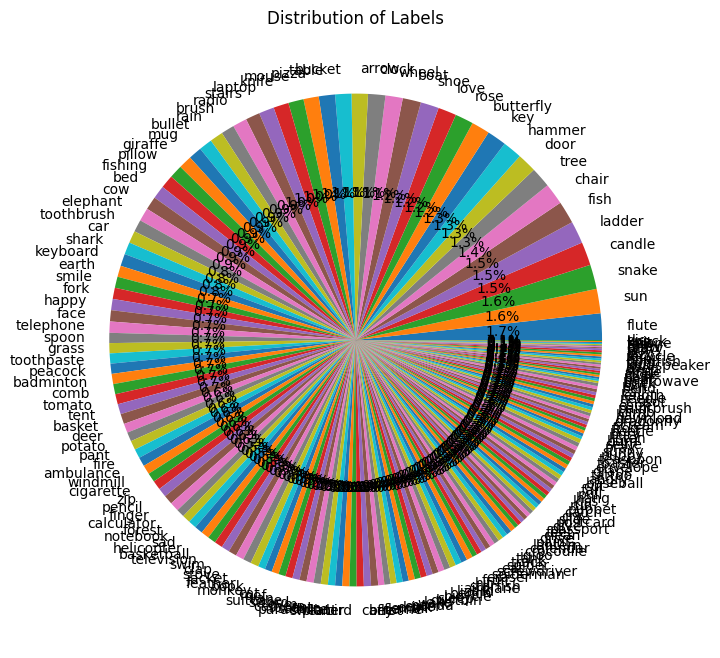

In [144]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()


In [145]:
# unique_entries = df[3].unique()
# print(unique_entries.count())
unique_entries = df[3].unique()
num_unique_entries = len(unique_entries)
print(num_unique_entries)


193


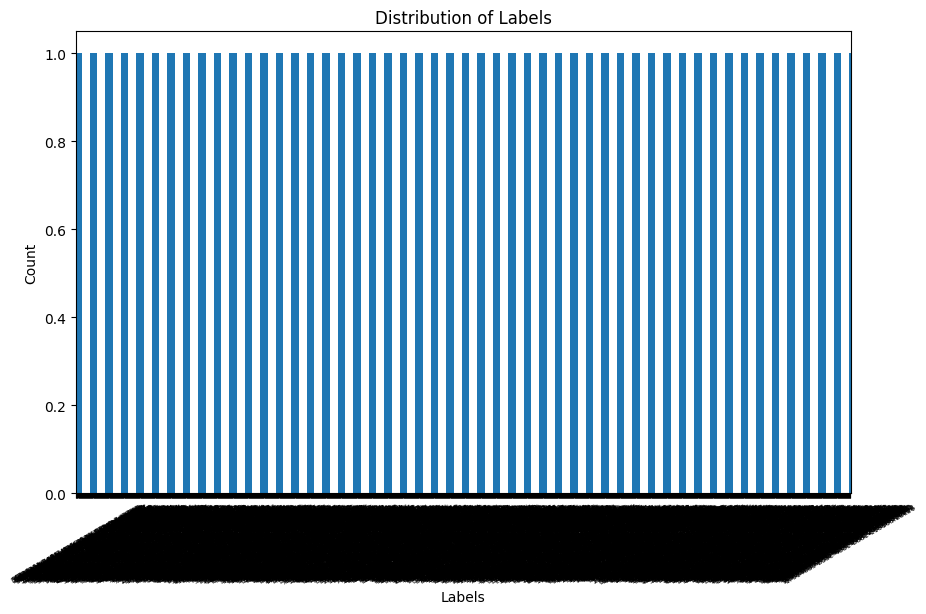

In [146]:
label_counts = df[0].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=30,fontsize=5)
plt.show()


In [147]:
column_3_counts = df[3].value_counts()

# Print the top N most frequent values
top_n = 50 # Change this to the desired number of top values
top_values = column_3_counts.head(top_n)
print(top_values)

3
flute         26
sun           24
snake         24
candle        23
ladder        22
fish          22
chair         21
tree          20
door          19
hammer        19
key           19
butterfly     18
rose          18
love          18
shoe          18
boat          18
wheel         17
clock         17
arrow         16
bucket        16
table         16
pizza         15
mouse         15
knife         15
laptop        15
stairs        14
radio         14
brush         13
rain          13
bullet        13
mug           13
giraffe       13
pillow        13
fishing       13
bed           13
cow           13
elephant      13
toothbrush    12
car           12
shark         12
keyboard      12
earth         11
smile         11
fork          11
happy         11
face          11
telephone     11
spoon         10
grass         10
toothpaste    10
Name: count, dtype: int64


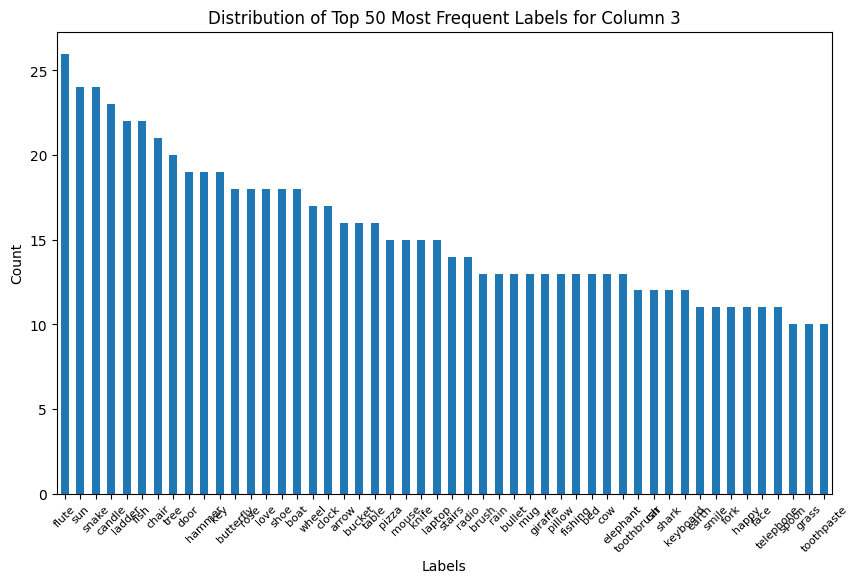

In [148]:
plt.figure(figsize=(10, 6))
top_values.plot(kind='bar')
plt.title(f'Distribution of Top {top_n} Most Frequent Labels for Column 3')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45,fontsize=8)
plt.show()

In [149]:
unique_entries = df[3].unique()
print(unique_entries)

['sleep' 'oven' 'chair' 'igloo' 'fish' 'fishing' 'radio' 'flute' 'tank'
 'keyboard' 'notebook' 'key' 'sweater' 'love' 'pillow' 'laptop' 'sad'
 'cow' 'stairs' 'book' 'clock' 'hammer' 'mouse' 'call' 'hard' 'pant' 'gym'
 'hit' 'bucket' 'knife' 'cigarette' 'rain' 'snake' 'comb' 'catch' 'tree'
 'brush' 'butterfly' 'cry' 'slide' 'calculator' 'telephone' 'rainy'
 'wheel' 'cook' 'bee' 'ambulance' 'drive' 'lantern' 'giraffe' 'badminton'
 'bicycle' 'sword' 'bullet' 'microwave' 'airplane' 'pencil' 'bird' 'stove'
 'starfish' 'truck' 'spoon' 'plant' 'television' 'pear' 'candle' 'eraser'
 'sun' 'lizard' 'puppy' 'parachute' 'ladder' 'car' 'arrow' 'close' 'ant'
 'helicopter' 'bench' 'suitcase' 'calendar' 'toothpaste' 'climb'
 'teaspoon' 'swim' 'far' 'needle' 'table' 'basketball' 'fruit' 'clap'
 'van' 'sing' 'baseball' 'spiderman' 'mug' 'finger' 'dragonfly'
 'toothbrush' 'loudspeaker' 'cat' 'shark' 'roof' 'deer' 'zip' 'dustbin'
 'basket' 'smile' 'fight' 'cut' 'walk' 'lake' 'angry' 'tattoo' 'grape'
 'sp

In [150]:
missing_values = df.isnull().any()

# Display columns with missing values
columns_with_missing = missing_values[missing_values].index
print("Columns with missing values:", columns_with_missing)


Columns with missing values: Index([], dtype='int64')


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1500 non-null   object
 1   1       1500 non-null   object
 2   2       1500 non-null   object
 3   3       1500 non-null   object
 4   4       1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [152]:
df.describe()

,0,1,2,3,4
count,1500,1500,1500,1500,1500.000000
unique,1500,1500,1500,193,1500.000000
top,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",flute,33.144312
freq,1,1,1,26,1.000000


In [153]:
for i in range(5): 
    null_values = df[i].isnull().sum()
    print(null_values)


0
0
0
0
0


##### From here we can note that the dataset has no null values in any column 

In [154]:
# class KNN:
#     def __init__(self, k, distance_metric, encoder_type):
#         self.k = k
#         self.distance_metric = distance_metric
#         self.encoder_type = encoder_type
#         self.data = []  
#         self.labels = [] 

#     def calc_distance(self, x1, X2):
#         # print(x1)
#         # print(x2[0])
#         x2 = X2[0]
#         # x2 = x2[0]
#         if self.distance_metric == "euclidean":
#             return np.linalg.norm(x1 - x2)
#         elif self.distance_metric == "manhattan":
#             return np.sum(np.abs(x1 - x2))
#         elif self.distance_metric == "cosine":
#             dot_product = np.dot(x1, x2)
#             norm_x1 = np.linalg.norm(x1)
#             norm_x2 = np.linalg.norm(x2)
#             cosine_distance = 1 - (dot_product / (norm_x1 * norm_x2))
#             return cosine_distance
#         else:
#             return 0

#     def fit(self, data, labels):
#         self.data = np.array(data)
#         # print(self.data)
#         self.labels = np.array(labels)

#     def predict(self, query):
#         distances = []
#         query = np.array(query) 
#         # print(self.data) has data embeddings 
#         # print(query) has VIT column 
#         # print(self.data[1][0].reshape(1,-1).shape)
#         for i in range(len(self.data)):
#             # print('yo') 
#             # print(query[1])
#             # print('yo2')
#             # print(self.data[i])
#             distance = self.calc_distance(query[1], self.data[i])
#             # print(distance)
#             distances.append((distance,i))
            
#         # print(distances) 

#         #now in this distance array I have the disstance of each embedding from my query and now I want
#         # to find the minimum k distances along with its indices
#         distances.sort()  # Sort the distances in ascending order
#         nearest_neighbors = distances[:self.k]  # Get the first k distances and their indices
#         # print(nearest_neighbors) 
#         # distances.sort(key=lambda x: x[0])
#         # neighbors_indices = [index for _, index in distances[:self.k]]
#         # print(neighbors_indices)
#         # distances = np.array(distances)
#         # print(distances)
#         # neighbors_indices = np.sort(distances)
#         # print(neighbors_indices)
#         #issue
#         #in this I want the indices of the the k nearest neighbours 
#         # [:self.k]
#         # print(neighbors_indices)
#         # neighbors_indices = nearest_neighbors[1] # i want an array containg all the second 
#         # column of the nearest_neighbours how to do that
#         neighbors_indices = [index for _, index in nearest_neighbors]
#         # print(neighbors_indices)
#         neighbor_labels = self.labels[neighbors_indices]
#         neighbor_labels = np.array(neighbor_labels)
#         # print(neighbor_labels)
#         unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
#         # print( counts)
#         # predicted_label = unique_labels[np.argmax(counts)]
#         # print(predicted_label)
#         max_count = np.max(counts)
#         # print(max_count)
#         freq = 0
#         for i in counts:
#             if(i == max_count):
#                 freq+=1
#         # print(freq)
#         #fixed till here
#         if freq > 1:
#             weight = np.zeros(len(self.data))
#             # print(weight)
#             for i in neighbors_indices:
#                 # print('neighbour_indices',i)
#                 # print(neighbors_indices)
#                 ind = np.where(self.labels[i] == unique_labels)[0]
#                 # print(ind) 
#                 if(len(ind) == 0):
#                     continue
#                 # print(ind)
#                 # print(ind[0])
#                 # print(counts)
#                 # print(counts[ind[0]])
#                 # ind = ind_[0]
#                 if (counts[ind[0]]==max_count):
#                     # distance = distances[i][0]
#                     print(query[1])
#                     print(self.data[i])
#                     distance = self.calc_distance(query[1],self.data[i])
#                     weight[i] += 1 / (1 + distance)
#                     if(weight[i]>0):
#                         print('weight is',i)
#                 print(weight)
#             predicted_index = np.argmax(weight)
#             predicted_label = self.labels[predicted_index]
#         else:
#             # print("hi")
#             ind_max_count = np.argmax(counts)
#             predicted_label=unique_labels[ind_max_count]
#         #     # max_count_labels = unique_labels[counts == max_count]
#         #     # min_distance = float('inf')
#         #     # predicted_label = None
#         #     # for label in max_count_labels:
#         #     #     label_indices = [index for index in neighbors_indices if self.labels[index] == label]
#         #     #     label_distances = [distances[index][0] for index in label_indices]
#         #     #     min_distance_index = np.argmin(label_distances)
#         #     #     if label_distances[min_distance_index] < min_distance:
#         #     #         min_distance = label_distances[min_distance_index]
#         #     #         predicted_label = label
#         return predicted_label
        

In [208]:
class KNN:
    def __init__(self, k, distance_metric):
        self.k = k
        self.distance_metric = distance_metric
        self.data = []  
        self.labels = [] 
    def calc_distance(self, x1, x2):
        # print("x1",x1)
        # print("x2",x2)
        # x2 = X2[0]
        # # x2 = x2[0]
        # print(x1.shape)
        # print(x2.shape)
        if self.distance_metric == "euclidean":
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == "manhattan":
            return np.sum(np.abs(x1 - x2))
        elif self.distance_metric == "cosine":
            dot_product = np.dot(x1, x2)
            norm_x1 = np.linalg.norm(x1)
            norm_x2 = np.linalg.norm(x2)
            cosine_distance = 1 - (dot_product / (norm_x1 * norm_x2))
            return cosine_distance
        else:
            return 0

    def fit(self, data, labels):
        self.data = np.array(data)
        # print("self.data",self.data)
        self.labels = np.array(labels)
        # print(self.data.shape)
        # print(self.labels.shape)

    def predict(self, query):
        distances = []
        query = np.array(query) 
        # print("query",query)
        # print(self.data) has data embeddings 
        # print(query) has VIT column 
        # print(self.data[1][0].reshape(1,-1).shape)
        for i in range(len(self.data)):
            # print('yo') 
            # print(query)
            # print('yo2')
            # print(self.data[i])
            # print(i)
            # distance = self.calc_distance(query[1], self.data[i])
            # # print(distance)
            # distances.append((distance,i))
            # if emb_type == 'resnet':
            distance = self.calc_distance(query, self.data[i])
            # print(distance)
            distances.append((distance,i))
        # print(distances) 

        #now in this distance array I have the disstance of each embedding from my query and now I want
        # to find the minimum k distances along with its indices
        distances.sort()  # Sort the distances in ascending order
        nearest_neighbors = distances[:self.k]  # Get the first k distances and their indices
        # print(nearest_neighbors) 
        # distances.sort(key=lambda x: x[0])
        # neighbors_indices = [index for _, index in distances[:self.k]]
        # print(neighbors_indices)
        # distances = np.array(distances)
        # print(distances)
        # neighbors_indices = np.sort(distances)
        # print(neighbors_indices)
        #issue
        #in this I want the indices of the the k nearest neighbours 
        # [:self.k]
        # print(neighbors_indices)
        # neighbors_indices = nearest_neighbors[1] # i want an array containg all the second 
        # column of the nearest_neighbours how to do that
        neighbors_indices = [index for _, index in nearest_neighbors]
        # print(neighbors_indices)
        neighbor_labels = self.labels[neighbors_indices]
        neighbor_labels = np.array(neighbor_labels)
        # print(neighbor_labels)
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        max_count = np.max(counts)
        ind_max_count = np.argmax(counts)
        predicted_label=unique_labels[ind_max_count]
        return predicted_label
        

In [209]:
labels_column_index = 3
labels = [row[labels_column_index] for row in data]
X_train, X_val, y_train, y_val = train_test_split(data[:,1:3],labels, test_size=0.2,random_state=40)
print(np.shape(X_train), np.shape(X_val), np.shape(y_train), np.shape(y_val))
# print(np.shape(X_train[0]), np.shape(X_val[0]), np.shape(y_train[0]), np.shape(y_val[0]))
# print(y_train)
print(X_val.shape)
# print(data[:,2])
# print(labels)
print(X_train.shape)
# print(y_val.shape)
# split_at = 0.8 * len(data)
# split = int(split_at)
# train_data = data[0:split]
# val_data = data[split:len(data)]
# y_val = val_data[:, 3]
# y_train = train_data[:, 3]
# X_train = train_data[:, 0:2]
# X_val = train_data[:, 0:2]
# print('yo')
# print(y_val.shape)

(1200, 2) (300, 2) (1200,) (300,)
(300, 2)
(1200, 2)


In [210]:
embeddings =  X_train[:,0]
knn_model = KNN(k=10, distance_metric='euclidean')
knn_model.fit(embeddings, y_train)
array_pred_label=[]
#predicted_label = knn_model.predict(X_val)
#print(X_val)
# for query_embedding in X_val:
#     predicted_label = knn_model.predict(query_embedding)
#     array_pred_label.append(predicted_label)


for query_embedding in X_val:
    #print("Query embedding",query_embedding)
    # print(query_embedding)
    # print(query_embedding[0].shape)
    predicted_label = knn_model.predict(query_embedding[0])
    array_pred_label.append(predicted_label)
    # print(array_pred_label)
    # print("Predicted label:", predicted_label)
    # array_for_pred_labels = np.fromstring(predicted_label[1:-1], dtype=float, sep=',')
validation_f1_score=f1_score(y_val,array_pred_label, average='macro')
print("F1-score:",validation_f1_score)
accuracy=accuracy_score(y_val,array_pred_label)
print("Accuracy :",accuracy)
precision = precision_score(y_val, array_pred_label, average='macro')
print("Precision:", precision)
recall = recall_score(y_val, array_pred_label, average='macro')
print("Recall:", recall)

F1-score: 0.10923517057417988
Accuracy : 0.20666666666666667
Precision: 0.1120326858813701
Recall: 0.13992011278195488


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
k_values = []
for i in range(1,16,2):
    k_values.append(i)
distance_metric =["euclidean","manhattan","cosine"]
encoder_type =["ResNet","VIT"]
embeddings = [row for row in X_train]
labels = y_train
for k in k_values:
    for distance in distance_metric:
        for type in encoder_type:
            knn_model = KNN(k, distance)
            if(type=="VIT"):
                 embeddings=X_train[:,0]
            if(type=="ResNet"):
                embeddings =  X_train[:,1]
            knn_model.fit(embeddings, y_train)
            array_pred_label=[]
            for query_embedding in X_val:
                print(X_val[0].shape)
                predicted_label = knn_model.predict(query_embedding[0])
                array_pred_label.append(predicted_label)
            accuracy=accuracy_score(y_val,array_pred_label)
            print("Accuracy :",accuracy)



(2,)


ValueError: operands could not be broadcast together with shapes (1,1024) (1,512) 

### Part 2 : Decision Tree

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('advertisement.csv')
df

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home
...,...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed,food furniture
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits,home clothing food
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat,sports clothing
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume,beauty


In [ ]:
for i in range(len(df.columns)): 
    null_values = df.iloc[:, i].isnull().sum()
    print(null_values,end=" ")

0 0 0 0 0 0 0 0 0 0 0 

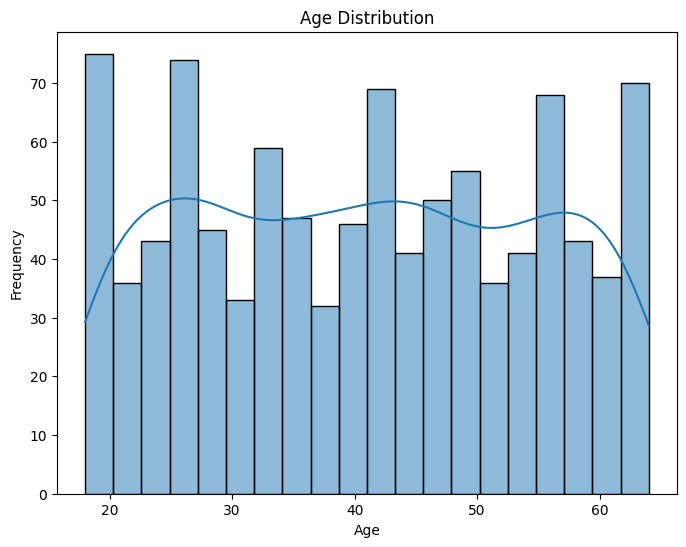

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


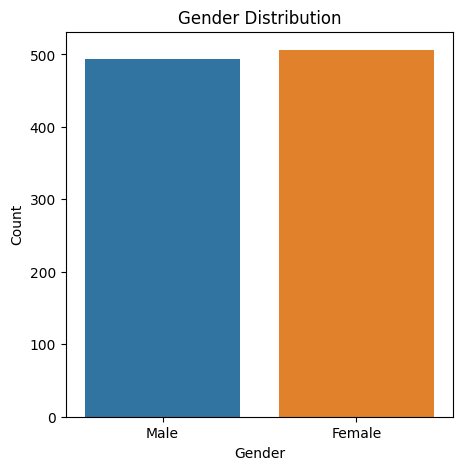

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


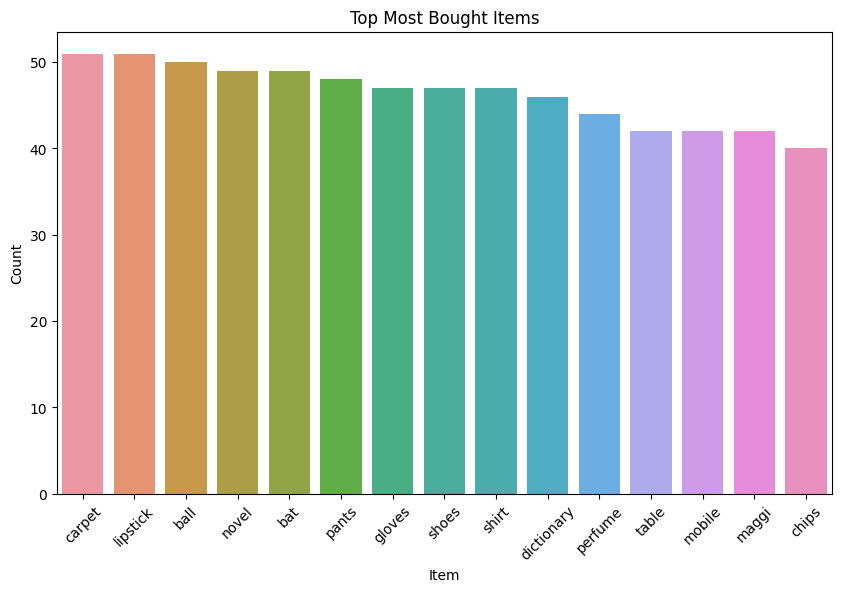

In [ ]:
plt.figure(figsize=(10, 6))
top_items = df['most bought item'].value_counts().head(15)
sns.barplot(x=top_items.index, y=top_items.values)
plt.title('Top Most Bought Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


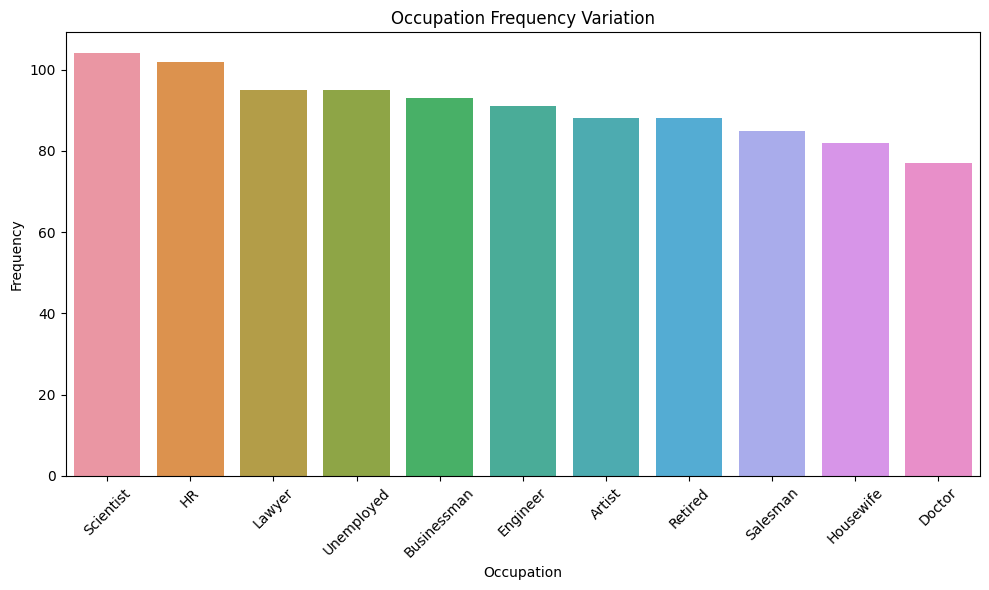

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
occupation_counts = df['occupation'].value_counts()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Frequency Variation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



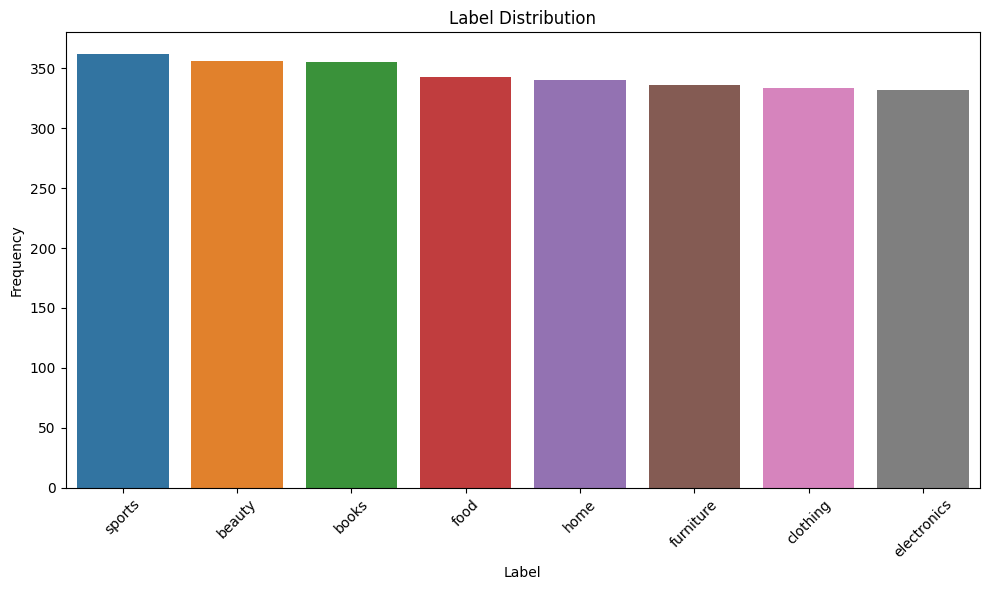

In [ ]:
plt.figure(figsize=(10, 6))
label_counts = df['labels'].str.split().explode().value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


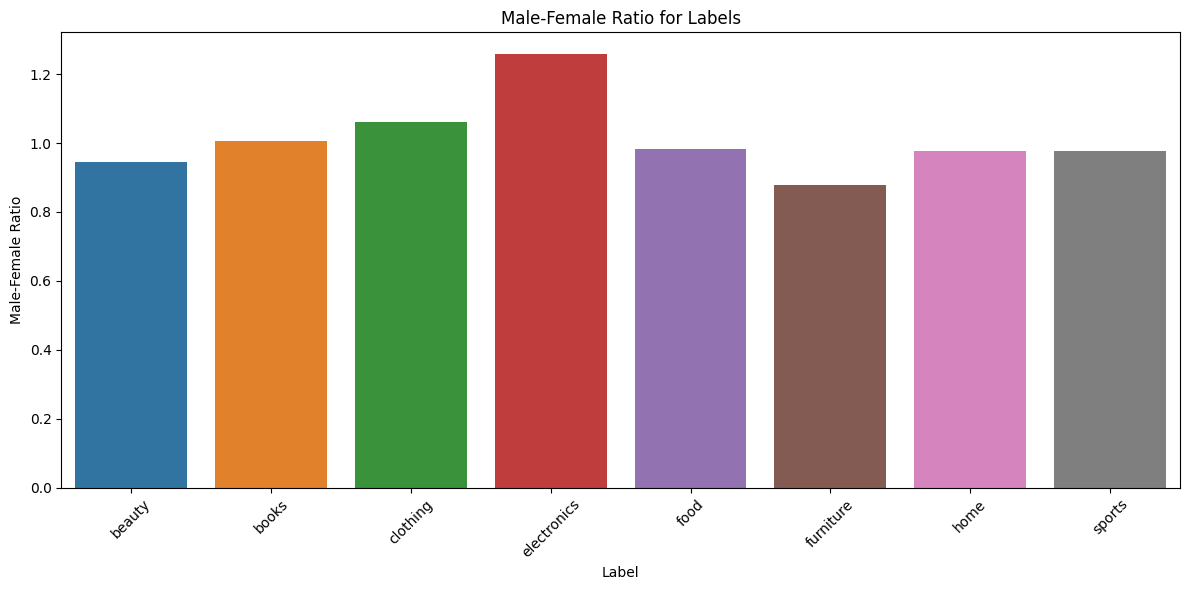

In [ ]:
labels_df = df['labels'].str.get_dummies(sep=' ')
columnLabels = df["labels"]
df = pd.concat([df, labels_df], axis=1)
df.drop(columns='labels', inplace=True)

label_columns = labels_df.columns
ratio_data = []
for label in label_columns:
    total_count = labels_df[label].sum()
    male_count = labels_df[label][df['gender'] == 'Male'].sum()
    female_count = total_count - male_count
    ratio = male_count / female_count if female_count != 0 else male_count
    ratio_data.append({'Label': label, 'Male Count': male_count, 'Female Count': female_count, 'Ratio': ratio})

ratio_df = pd.DataFrame(ratio_data)

plt.figure(figsize=(12, 6))
sns.barplot(data=ratio_df, x='Label', y='Ratio')
plt.title('Male-Female Ratio for Labels')
plt.xlabel('Label')
plt.ylabel('Male-Female Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
labels = columnLabels.apply(lambda x: x.split(" "))
for i in labels:
    i.sort()
# labels
dictMultiOutput = {}
for i in range(len(labels)):
    element = str(labels[i])
    if element in dictMultiOutput.keys():
        dictMultiOutput[element] += 1
    else:
        dictMultiOutput[element] = 1
encodedLabelsWithMultiOutput = [dictMultiOutput[str(labels[i])] for i in range(len(labels))]

In [ ]:
all_labels = labels.sum()
unique_labelsTemp = set(all_labels)
num_unique_labels = len(unique_labelsTemp)
# print("All labels:", all_labels)
print("Number of unique labels:", num_unique_labels)
unique_labels = []
for i in unique_labelsTemp:
    unique_labels.append(i)
unique_labels.sort()

Number of unique labels: 8


In [ ]:
# power set making and label encoding
def powerset(lst):
    n = len(lst)
    powerset = []
    
    for i in range(2**n):
        subset = []
        for j in range(n):
            if (i >> j) & 1:
                subset.append(lst[j])
        powerset.append(subset)
    
    return powerset

powerSet = powerset(unique_labels)

powerSetDict = {tuple(powerSet[i]):i for i in range(len(powerSet))}
encodedLabelsWithPowerSet = [powerSetDict[tuple(labels[i])] for i in range(len(labels))]
dfTemp = pd.DataFrame()
dfTemp["labels"] = labels
dfTemp["labelsEncoding"] = encodedLabelsWithPowerSet
dfTemp

,labels,labelsEncoding
0,"[clothing, electronics, sports]",140
1,"[beauty, furniture]",33
2,"[clothing, electronics, food, sports]",156
3,[food],16
4,[home],64
...,...,...
995,"[food, furniture]",48
996,"[clothing, food, home]",84
997,"[clothing, sports]",132
998,[beauty],1


### Multi-Output - Decision tree classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class DecisionTree:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.model = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, criterion=self.criterion)
        self.classifiers = []

    def fit(self, X, y):
        self.model.fit(X,y)
            
    def predict(self, X):
        predictions = self.model.predict(X)
        return predictions



In [ ]:
df = pd.read_csv('advertisement.csv')
df

,age,gender,income,education,married,children,city,occupation,purchase_amount,most bought item,labels
0,45,Male,61271.953359,Master,False,3,Lake Sheila,Doctor,87.697118,monitor,electronics clothing sports
1,24,Female,53229.101074,High School,False,1,Crystalburgh,Businessman,115.135586,lipstick,furniture beauty
2,45,Female,30066.046684,Bachelor,True,3,Margaretburgh,Engineer,101.694559,biscuits,clothing electronics food sports
3,19,Male,48950.246384,PhD,False,0,Williamshaven,Lawyer,97.964887,maggi,food
4,29,Female,44792.627094,Master,False,0,New Paul,Businessman,86.847281,carpet,home
...,...,...,...,...,...,...,...,...,...,...,...
995,61,Male,34246.773063,Master,True,3,Solisfurt,HR,103.357441,bed,food furniture
996,56,Female,45494.225591,Bachelor,False,0,Dawsonmouth,Engineer,85.159023,biscuits,home clothing food
997,64,Female,68740.442006,PhD,True,0,Lake Garyport,Salesman,101.434650,bat,sports clothing
998,18,Female,44348.446680,Bachelor,True,0,Ericfurt,Retired,97.649988,perfume,beauty


In [ ]:
from sklearn.model_selection import train_test_split

#splitting the data and seperating the labels 
yP = encodedLabelsWithPowerSet
yM = encodedLabelsWithMultiOutput
x = df.drop("labels", axis=1)
# print(yM)
# Define categorical columns for one-hot encoding
categorical_columns = ["gender", "education", "married", "city", "occupation", "most bought item"]

# Perform one-hot encoding on categorical columns
x_data_encoded = pd.get_dummies(x, columns=categorical_columns)

# Split the data into training and testing sets
x_trainM, x_testM, y_trainM, y_testM = train_test_split(x_data_encoded, yM, test_size=0.2, random_state=42)
x_trainP, x_testP, y_trainP, y_testP = train_test_split(x_data_encoded, yP, test_size=0.2, random_state=42)

[7, 14, 4, 10, 15, 8, 6, 14, 4, 19, 11, 9, 15, 3, 6, 8, 3, 3, 6, 19, 12, 3, 16, 6, 11, 2, 3, 12, 4, 2, 8, 6, 5, 14, 8, 5, 8, 2, 5, 8, 3, 8, 13, 19, 3, 7, 14, 10, 5, 4, 1, 1, 8, 24, 3, 11, 5, 5, 11, 9, 7, 1, 16, 14, 11, 19, 23, 9, 3, 13, 14, 5, 17, 3, 1, 8, 1, 11, 8, 5, 15, 11, 13, 9, 15, 8, 7, 10, 7, 8, 3, 8, 14, 24, 8, 11, 3, 11, 23, 10, 3, 24, 14, 8, 11, 19, 13, 6, 8, 11, 6, 2, 9, 8, 8, 2, 4, 11, 1, 5, 15, 1, 23, 4, 7, 8, 6, 14, 5, 10, 7, 9, 5, 24, 20, 1, 17, 11, 23, 4, 5, 8, 20, 10, 7, 5, 23, 10, 12, 11, 14, 3, 11, 4, 7, 10, 2, 24, 6, 8, 8, 1, 2, 7, 15, 24, 9, 14, 2, 14, 7, 7, 15, 14, 14, 14, 13, 11, 3, 6, 10, 24, 20, 15, 9, 3, 13, 14, 3, 14, 13, 10, 17, 7, 1, 9, 1, 6, 10, 7, 11, 8, 7, 4, 4, 4, 15, 6, 1, 7, 7, 10, 15, 24, 4, 14, 7, 14, 8, 4, 2, 9, 5, 3, 2, 7, 3, 4, 11, 8, 15, 15, 2, 7, 5, 2, 8, 13, 14, 6, 3, 7, 23, 7, 10, 14, 10, 8, 11, 2, 9, 14, 2, 14, 6, 7, 17, 15, 10, 14, 7, 1, 16, 15, 7, 10, 11, 9, 8, 6, 3, 7, 1, 7, 4, 5, 2, 11, 10, 1, 9, 11, 8, 5, 3, 11, 13, 11, 7, 5, 23, 14, 2

In [ ]:
from sklearn.metrics import accuracy_score

DTmodelV1 = DecisionTree(criterion='entropy',max_depth=5,max_features=11)
DTmodelV1.fit(x_trainP,y_trainP)
y_preds = DTmodelV1.predict(x_testP)
# acc = accuracy_score(y_testP,y_preds)
# acc
# print(type(y_testP))
y_testP=np.array(y_testP)
# print(type(y_preds))
acc_powerset = accuracy_score(y_testP, y_preds)
f1_micro_powerset = f1_score(y_testP, y_preds, average='micro')
f1_macro_powerset = f1_score(y_testP, y_preds, average='macro')
precision_micro_powerset = precision_score(y_testP, y_preds, average='micro')
recall_micro_powerset = recall_score(y_testP, y_preds, average='micro')
conf_matrix_powerset = multilabel_confusion_matrix(y_testP, y_preds)

# Print or use the calculated metrics as needed
print("PowerSet Setting Metrics:")
print("Accuracy:", acc_powerset)
print("F1 Micro:", f1_micro_powerset)
print("F1 Macro:", f1_macro_powerset)
print("Precision (Micro):", precision_micro_powerset)
print("Recall (Micro):", recall_micro_powerset)
print("Confusion Matrix:")
print(conf_matrix_powerset)
    

PowerSet Setting Metrics:
Accuracy: 0.025
F1 Micro: 0.025000000000000005
F1 Macro: 0.005215867940071245
Precision (Micro): 0.025
Recall (Micro): 0.025
Confusion Matrix:
[[[196   0]
  [  3   1]]

 [[199   0]
  [  1   0]]

 [[197   0]
  [  3   0]]

 [[101  94]
  [  3   2]]

 [[180  17]
  [  2   1]]

 [[198   0]
  [  2   0]]

 [[196   0]
  [  4   0]]

 [[198   0]
  [  2   0]]

 [[198   0]
  [  2   0]]

 [[199   0]
  [  1   0]]

 [[198   0]
  [  2   0]]

 [[197   0]
  [  3   0]]

 [[199   0]
  [  1   0]]

 [[198   0]
  [  2   0]]

 [[199   0]
  [  1   0]]

 [[199   0]
  [  1   0]]

 [[197   0]
  [  3   0]]

 [[198   0]
  [  2   0]]

 [[199   0]
  [  1   0]]

 [[198   0]
  [  2   0]]

 [[199   0]
  [  1   0]]

 [[197   0]
  [  3   0]]

 [[199   0]
  [  1   0]]

 [[196   0]
  [  4   0]]

 [[199   0]
  [  1   0]]

 [[197   0]
  [  3   0]]

 [[198   0]
  [  2   0]]

 [[198   0]
  [  2   0]]

 [[197   0]
  [  3   0]]

 [[199   0]
  [  1   0]]

 [[199   0]
  [  1   0]]

 [[195   0]
  [  5   0]]


In [ ]:
from sklearn.metrics import accuracy_score

DTmodelV2 = DecisionTree()
DTmodelV2.fit(x_trainM,y_trainM)
y_preds = DTmodelV2.predict(x_testM)
# acc = accuracy_score(y_testM,y_preds)
# acc
acc_multioutput = accuracy_score(y_testM, y_preds)
f1_micro_multioutput = f1_score(y_testM, y_preds, average='micro')
f1_macro_multioutput = f1_score(y_testM, y_preds, average='macro')
precision_micro_multioutput = precision_score(y_testM, y_preds, average='micro')
recall_micro_multioutput = recall_score(y_testM, y_preds, average='micro')
conf_matrix_multioutput = multilabel_confusion_matrix(y_testM, y_preds)
print("\nMultiOutput Setting Metrics:")
print("Accuracy:", acc_multioutput)
print("F1 Micro:", f1_micro_multioutput)
print("F1 Macro:", f1_macro_multioutput)
print("Precision (Micro):", precision_micro_multioutput)
print("Recall (Micro):", recall_micro_multioutput)
print("Confusion Matrix (MultiOutput):")
print(conf_matrix_multioutput)



MultiOutput Setting Metrics:
Accuracy: 0.12
F1 Micro: 0.12
F1 Macro: 0.10005051532220721
Precision (Micro): 0.12
Recall (Micro): 0.12
Confusion Matrix (MultiOutput):
[[[179  12]
  [  8   1]]

 [[170  18]
  [ 12   0]]

 [[174  13]
  [ 12   1]]

 [[178  10]
  [ 12   0]]

 [[175  13]
  [ 10   2]]

 [[180   4]
  [ 16   0]]

 [[160  23]
  [ 12   5]]

 [[172  13]
  [ 14   1]]

 [[187   5]
  [  7   1]]

 [[178   9]
  [ 12   1]]

 [[171  12]
  [ 12   5]]

 [[196   1]
  [  3   0]]

 [[191   3]
  [  5   1]]

 [[176  10]
  [ 13   1]]

 [[187   5]
  [  8   0]]

 [[194   5]
  [  1   0]]

 [[193   3]
  [  4   0]]

 [[194   1]
  [  5   0]]

 [[192   4]
  [  3   1]]

 [[190   5]
  [  5   0]]

 [[187   7]
  [  2   4]]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Create a dictionary to store F1 scores and accuracies
scores = {}

# Loop through all the combinations of hyperparameters
for criterion in ['gini', 'entropy']:
    for max_depth in [3, 5, 10, 20, 30]:
        for max_features in [3, 5, 7, 9, 11]:
            # Train the model with the current hyperparameters
            DTmodelV2 = DecisionTree(criterion=criterion, max_depth=max_depth, max_features=max_features)
            DTmodelV2.fit(x_trainM, y_trainM)
            y_preds = DTmodelV2.predict(x_testM)
            
            # Calculate the accuracy and F1 score
            accuracy = accuracy_score(y_testM, y_preds)
            f1 = f1_score(y_testM, y_preds, average='micro')  # You can use 'macro' or 'weighted' as well
            
            hyperparameters = (criterion, max_depth, max_features)
            scores[hyperparameters] = {'accuracy': accuracy, 'f1_score': f1}

# Sort the dictionary by F1 scores in descending order
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1]['accuracy'], reverse=True))

# Select the top 3 sets of hyperparameters
top_3_hyperparameters = list(sorted_scores.keys())[:3]

print("Top 3 performing sets of hyperparameters:")
for i, hyperparameters in enumerate(top_3_hyperparameters):
    print(f"{i+1}. Criterion: {hyperparameters[0]}, Max Depth: {hyperparameters[1]}, Max Features: {hyperparameters[2]}")
    print(f"   Accuracy: {sorted_scores[hyperparameters]['accuracy']:.4f}, F1 Score: {sorted_scores[hyperparameters]['f1_score']:.4f}")


Top 3 performing sets of hyperparameters:
1. Criterion: entropy, Max Depth: 20, Max Features: 11
   Accuracy: 0.1150, F1 Score: 0.1150
2. Criterion: entropy, Max Depth: 10, Max Features: 3
   Accuracy: 0.1000, F1 Score: 0.1000
3. Criterion: gini, Max Depth: 20, Max Features: 7
   Accuracy: 0.0950, F1 Score: 0.0950


ValueError: num must be 1 <= num <= 16, not 17

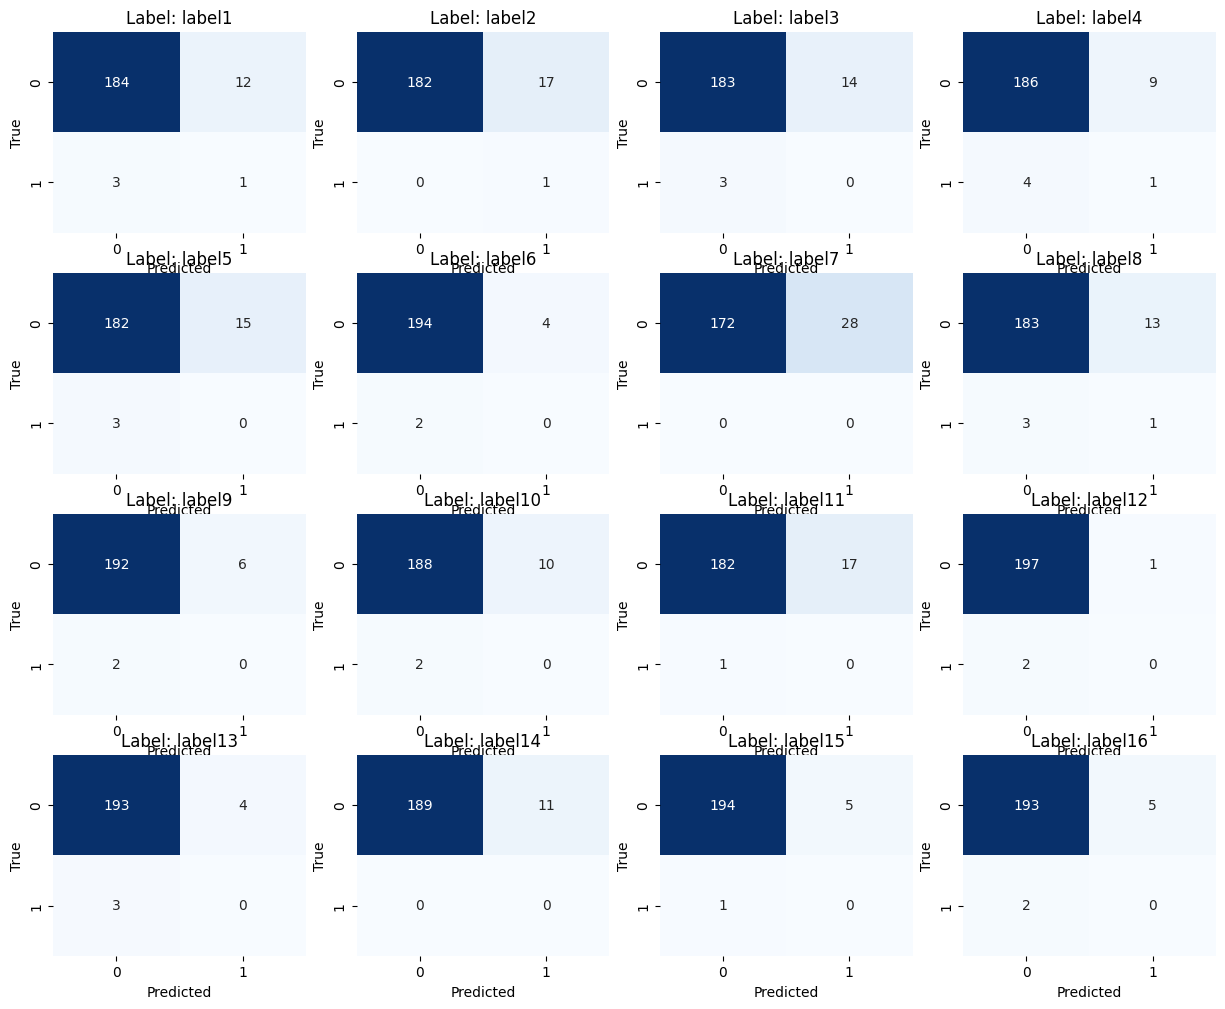

In [ ]:
def plot_confusion_matrix(conf_matrix, labels):
    num_labels = len(labels)
    num_rows = int(np.ceil(num_labels / 4))
    num_cols = min(4, num_labels)
    plt.figure(figsize=(15, 3 * num_rows))
    for i, matrix in enumerate(conf_matrix):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Label: {labels[i]}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Specify the labels you want to visualize (up to 16 labels in this case)
label_names = ['label1', 'label2', 'label3', 'label4', 'label5', 'label6', 'label7', 'label8', 'label9', 'label10', 'label11', 'label12', 'label13', 'label14', 'label15', 'label16']

# Plot confusion matrix heatmaps for PowerSet and MultiOutput settings
plot_confusion_matrix(conf_matrix_powerset, label_names)
plot_confusion_matrix(conf_matrix_multioutput, label_names)


### Task 3.4.1 part 3

In [162]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the best hyperparameters for PowerSet and MultiOutput approaches
best_hyperparameters_powerset = ('entropy', 30, 11)  # Replace with actual best hyperparameters
best_hyperparameters_multioutput = ('gini', 10, 5)   # Replace with actual best hyperparameters

# Define the number of folds for cross-validation
num_folds = 5
y_testP=np.array(y_testP)
y_testM=np.array(y_testM)
# Initialize lists to store metrics
metrics_powerset = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
metrics_multioutput = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

# Initialize StratifiedKFold for PowerSet and MultiOutput
kf_powerset = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
kf_multioutput = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# K-fold cross-validation for PowerSet approach
for train_index, val_index in kf_powerset.split(x_trainM, y_trainP.argmax(axis=1)):
    x_train_fold, x_val_fold = x_trainM[train_index], x_trainM[val_index]
    y_train_fold, y_val_fold = y_trainP[train_index], y_trainP[val_index]
    
    # Train the model with the best hyperparameters
    model = DecisionTree(criterion=best_hyperparameters_powerset[0],
                         max_depth=best_hyperparameters_powerset[1],
                         max_features=best_hyperparameters_powerset[2])
    model.fit(x_train_fold, y_train_fold)
    
    # Predict on the validation set
    y_preds = model.predict(x_val_fold)
    
    # Calculate and store metrics
    accuracy = accuracy_score(y_val_fold.argmax(axis=1), y_preds.argmax(axis=1))
    precision = precision_score(y_val_fold.argmax(axis=1), y_preds.argmax(axis=1), average='micro')
    recall = recall_score(y_val_fold.argmax(axis=1), y_preds.argmax(axis=1), average='micro')
    f1 = f1_score(y_val_fold.argmax(axis=1), y_preds.argmax(axis=1), average='micro')
    
    metrics_powerset['accuracy'].append(accuracy)
    metrics_powerset['precision'].append(precision)
    metrics_powerset['recall'].append(recall)
    metrics_powerset['f1_score'].append(f1)

# K-fold cross-validation for MultiOutput approach
for train_index, val_index in kf_multioutput.split(x_trainM, y_trainM):
    x_train_fold, x_val_fold = x_trainM[train_index], x_trainM[val_index]
    y_train_fold, y_val_fold = y_trainM[train_index], y_trainM[val_index]
    
    # Train the model with the best hyperparameters
    model = DecisionTree(criterion=best_hyperparameters_multioutput[0],
                         max_depth=best_hyperparameters_multioutput[1],
                         max_features=best_hyperparameters_multioutput[2])
    model.fit(x_train_fold, y_train_fold)
    
    # Predict on the validation set
    y_preds = model.predict(x_val_fold)
    
    # Calculate and store metrics
    accuracy = accuracy_score(y_val_fold, y_preds)
    precision = precision_score(y_val_fold, y_preds, average='micro')
    recall = recall_score(y_val_fold, y_preds, average='micro')
    f1 = f1_score(y_val_fold, y_preds, average='micro')
    
    metrics_multioutput['accuracy'].append(accuracy)
    metrics_multioutput['precision'].append(precision)
    metrics_multioutput['recall'].append(recall)
    metrics_multioutput['f1_score'].append(f1)

# Print average metrics for PowerSet approach
print("Metrics for PowerSet approach:")
print(f"Accuracy: {sum(metrics_powerset['accuracy']) / num_folds:.4f}")
print(f"Precision: {sum(metrics_powerset['precision']) / num_folds:.4f}")
print(f"Recall: {sum(metrics_powerset['recall']) / num_folds:.4f}")
print(f"F1 Score: {sum(metrics_powerset['f1_score']) / num_folds:.4f}")
print()

# Print average metrics for MultiOutput approach
print("Metrics for MultiOutput approach:")
print(f"Accuracy: {sum(metrics_multioutput['accuracy']) / num_folds:.4f}")
print(f"Precision: {sum(metrics_multioutput['precision']) / num_folds:.4f}")
print(f"Recall: {sum(metrics_multioutput['recall']) / num_folds:.4f}")
print(f"F1 Score: {sum(metrics_multioutput['f1_score']) / num_folds:.4f}")


AttributeError: 'list' object has no attribute 'argmax'